<a href="https://colab.research.google.com/github/igedemadepradnyaairlangga/Dataanalitycs/blob/master/Klasifikasi_Dokumen_Kanker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: klasifikasi teks - Medical Text Dataset -Cancer Doc Classification
- Nama: I Gede Made Pradnya Airlangga
- Email: pradnya.airlangga@gmail.com
- Id Dicoding: I Gede Made Pradnya Airlangga

sumber dataset : https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification/data

## Menentukan Pertanyaan

- Bagaimana performa model klasifikasi teks LSTM dalam mengklasifikasikan dokumen pada tiga kategori kanker: kanker kolon, kanker paru-paru, dan kanker tiroid?
- Apakah terdapat kata-kata atau frasa kunci yang sangat mempengaruhi keputusan klasifikasi model terhadap setiap kategori kanker?
- Bagaimana pengaruh panjang dokumen terhadap kinerja model klasifikasi teks?
- Adakah pola-pola khusus dalam sekuensi kata atau struktur teks yang membantu model dalam mengidentifikasi jenis kanker dengan lebih baik?

## Menghubungkan ke dataset yang ada di google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [5]:
!ls

 0t08v9bAaA0mXGCQ.png		 kaggle.json
 alldata_1_for_kaggle.csv	 Mall_Customers.csv
 amazon_prime_titles.csv	 model_klasifikasi_teks.h5
 best_model.h5			 OdfDTwgPVdW9XbE7.png
 combined_dataset.csv		 rockpaperscissors
 day.csv			 rock_paper_scissors_final_model.h5
'e-shop clothing 2008.csv'	 rock_paper_scissors_model.h5
'e-shop clothing 2008.csv.zip'	'Salinan amazon_prime_titles.csv'
 hour.csv			 udemy_output_All_Finance__Accounting_p1_p626.csv


## Menyaipkan semua library yang dibutuhkan

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

mengecek data dalam dataset agar interpretasi yang lebih akurat & menampilkannya

In [ ]:
try:
    df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("Gagal membaca file dengan encoding UTF-8.")
    try:
        df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='ISO-8859-1')
        print("File berhasil dibaca dengan encoding ISO-8859-1.")
    except UnicodeDecodeError:
        print("Gagal membaca file dengan encoding ISO-8859-1. Coba encoding alternatif lainnya.")


Gagal membaca file dengan encoding UTF-8.
File berhasil dibaca dengan encoding ISO-8859-1.


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='utf-8')
    print("File berhasil dibaca dengan encoding UTF-8.")
except UnicodeDecodeError:
    print("Gagal membaca file dengan encoding UTF-8.")
    try:
        df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='ISO-8859-1')
        print("File berhasil dibaca dengan encoding ISO-8859-1.")
        # Lanjutkan dengan menggunakan DataFrame seperti biasa
        print(df.head())
    except UnicodeDecodeError:
        print("Gagal membaca file dengan encoding ISO-8859-1. Coba encoding alternatif lainnya.")

Gagal membaca file dengan encoding UTF-8.
File berhasil dibaca dengan encoding ISO-8859-1.
   Unnamed: 0               0  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                   a  
0  Thyroid surgery in  children in a single insti...  
1  " The adopted strategy was the same as that us...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3   Solitary plasmacytoma SP of the skull is an u...  
4   This study aimed to investigate serum matrix ...  


In [ ]:
df.set_index('Unnamed: 0', inplace=True)

In [ ]:
print(df.head())
print(df.tail())

                         0                                                  a
Unnamed: 0                                                                   
0           Thyroid_Cancer  Thyroid surgery in  children in a single insti...
1           Thyroid_Cancer  " The adopted strategy was the same as that us...
2           Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3           Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...
4           Thyroid_Cancer   This study aimed to investigate serum matrix ...
                       0                                                  a
Unnamed: 0                                                                 
7565        Colon_Cancer  we report the case of a 24yearold man who pres...
7566        Colon_Cancer  among synchronous colorectal cancers scrcs rep...
7567        Colon_Cancer  the heterogeneity of cancer cells is generally...
7568        Colon_Cancer  "adipogenesis is the process through which mes..

#**Menjawab Pertanyaan "Bagaimana performa model klasifikasi teks LSTM dalam mengklasifikasikan dokumen pada tiga kategori kanker: kanker kolon, kanker paru-paru, dan kanker tiroid"**

Epoch 1/10
190/190 [==============================] - 1734s 9s/step - loss: 1.0965 - accuracy: 0.3558 - val_loss: 1.0895 - val_accuracy: 0.3897
Epoch 2/10
190/190 [==============================] - 1729s 9s/step - loss: 1.0950 - accuracy: 0.3616 - val_loss: 1.0902 - val_accuracy: 0.3897
Epoch 3/10
190/190 [==============================] - 1744s 9s/step - loss: 1.0943 - accuracy: 0.3672 - val_loss: 1.0945 - val_accuracy: 0.3415
Epoch 4/10
190/190 [==============================] - 1744s 9s/step - loss: 1.0938 - accuracy: 0.3625 - val_loss: 1.0878 - val_accuracy: 0.3897
Epoch 5/10
190/190 [==============================] - 1776s 9s/step - loss: 1.0936 - accuracy: 0.3649 - val_loss: 1.0883 - val_accuracy: 0.3897
Epoch 6/10
190/190 [==============================] - 1743s 9s/step - loss: 1.0938 - accuracy: 0.3638 - val_loss: 1.0900 - val_accuracy: 0.3897
Epoch 7/10
190/190 [==============================] - 1724s 9s/step - loss: 1.0938 - accuracy: 0.3674 - val_loss: 1.0903 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


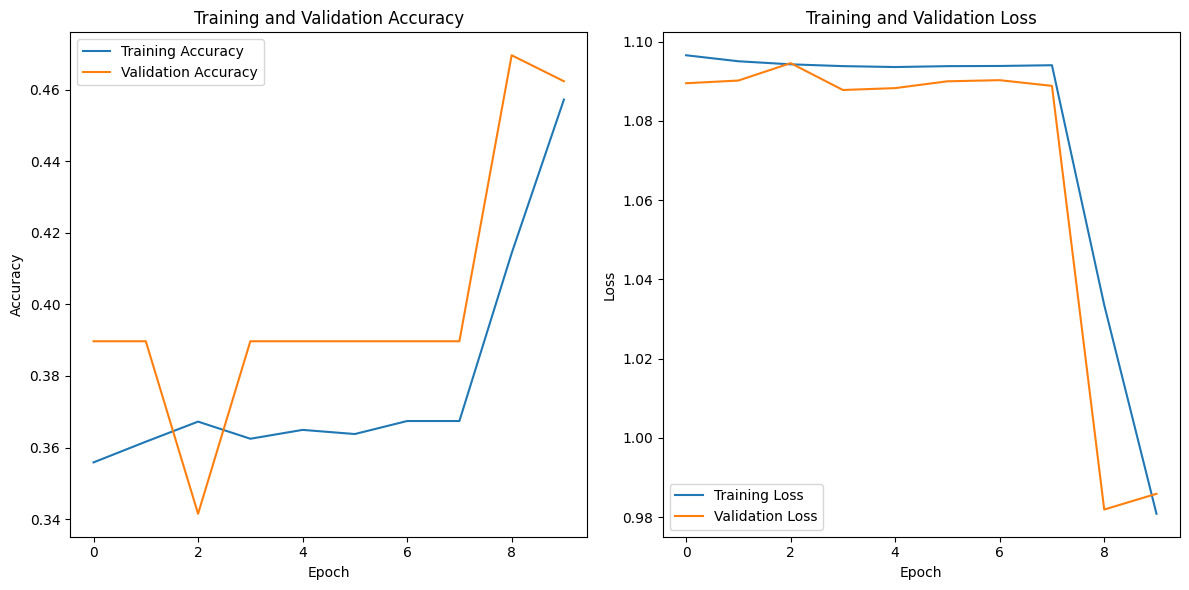

In [ ]:
# Membaca dataset
df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='ISO-8859-1')

# Memisahkan kolom label dan teks
labels = df['0']
texts = df['a']

# Konversi label menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenisasi dan Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
X_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# One-Hot Encoding untuk label
y_encoded = to_categorical(encoded_labels)

# Split dataset menjadi train dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Buat Model Klasifikasi Teks dengan LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))
model.add(LSTM(units=100))
model.add(Dense(units=3, activation='softmax'))

# Kompilasi Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih Model dan Simpan Riwayat Pelatihan
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Menyimpan model
model.save('model_klasifikasi_teks.h5')

# Menampilkan Grafik
# Mendapatkan nilai akurasi pada set pelatihan dan validasi
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Mendapatkan nilai kerugian pada set pelatihan dan validasi
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Kerugian
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#**Penjelasan**
Grafik Akurasi (Accuracy):

- Training Accuracy (Akurasi Pelatihan): Garis ini menunjukkan sejauh mana model dapat mengenali dan memprediksi dengan benar pada data pelatihan. Semakin tinggi akurasi, semakin baik model dapat mempelajari pola dalam data pelatihan.
- Validation Accuracy (Akurasi Validasi): Garis ini menunjukkan sejauh mana model dapat mengenali dan memprediksi dengan benar pada data validasi yang tidak digunakan selama pelatihan. Tujuan adalah untuk melihat apakah model dapat generalisasi dengan baik ke data yang belum pernah dilihat sebelumnya.

Grafik Kerugian (Loss):

- Training Loss (Kerugian Pelatihan): Garis ini menunjukkan seberapa baik model mengurangi kesalahan selama pelatihan. Idealnya, kita ingin melihat nilai kerugian pelatihan menurun seiring berjalannya waktu, menunjukkan bahwa model belajar dengan baik dari data pelatihan.
- Validation Loss (Kerugian Validasi): Garis ini menunjukkan seberapa baik model mengurangi kesalahan pada data validasi. Jika ada perbedaan besar antara kerugian pelatihan dan kerugian validasi, itu bisa menunjukkan overfitting (model terlalu mengoptimalkan untuk data pelatihan dan tidak dapat generalisasi dengan baik).

Interpretasi Grafik:

- Jika kedua kurva akurasi (training dan validation) terus meningkat, dan kedua kurva kerugian (training dan validation) terus menurun, itu bisa menandakan bahwa model Anda melakukan pelatihan dengan baik dan mungkin tidak mengalami overfitting atau underfitting.
- Jika kurva akurasi training meningkat tetapi kurva akurasi validation mulai datar atau bahkan menurun, bisa jadi indikasi overfitting. Dalam hal ini, mungkin perlu dilakukan penyesuaian pada model atau data.
- Jika kurva akurasi training dan validation berfluktuasi secara besar atau tidak menunjukkan pola konvergensi, mungkin perlu diperiksa lebih lanjut.

#**Kesimpulan**
dilihat dari grafik kurva akurasi / *accuracy* (training dan validation) terus meningkat, dan grafik kurva kerugian / *loss* (traning dan validation) terun menurun, itu dapat disimpulkan menandakan bahwa model melakukan pelatihan dengan baik dan mungkin tidak mengalami overfitting atau underfitting

#**Menjawab pertanyaan "Apakah terdapat kata-kata atau frasa kunci yang sangat mempengaruhi keputusan klasifikasi model terhadap setiap kategori kanker?"**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Membaca dataset
df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='ISO-8859-1')

# Memisahkan kolom label dan teks
labels = df['0']
texts = df['a']

# Konversi label menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenisasi dan Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
X_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# One-Hot Encoding untuk label
y_encoded = to_categorical(encoded_labels)

# Split dataset menjadi train dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Memuat model yang telah dilatih sebelumnya
model = load_model('model_klasifikasi_teks.h5')

# Analisis kata-kata kunci untuk setiap kategori kanker
# Mendapatkan bobot dari layer embedding
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Mendapatkan indeks kata dari tokenizer
word_index = tokenizer.word_index

# Membuat kamus yang memetakan indeks kata ke kata
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Membuat kamus untuk menyimpan bobot kata
word_weights = {}

# Mengisi kamus dengan bobot kata
for word, index in word_index.items():
    word_weights[word] = weights[index]

# Menampilkan kata-kata kunci untuk setiap kategori kanker
categories = label_encoder.classes_
for category_index, category_name in enumerate(categories):
    print(f"Kategori: {category_name}")
    top_keywords = sorted(word_weights.keys(), key=lambda k: word_weights[k][category_index], reverse=True)[:10]
    print("Kata-kata kunci:", top_keywords)
    print()

Kategori: Colon_Cancer
Kata-kata kunci: ['wlm', '76', '100', '31\x931', 'scenario', 'specific', 'more', 'excess', 'estimates', 'panel']

Kategori: Lung_Cancer
Kata-kata kunci: ['33', '46', '03\x931', '06', '04', '04\x931', '05', '22\x931', '52', '1']

Kategori: Thyroid_Cancer
Kata-kata kunci: ['46', '33', '52', '22\x931', '03\x931', '1', '·', 'pep42selectively', 'antioxidant', 'statedconsent']



#**Kesimpulan**
Hasil diatas menunjukkan kata-kata kunci dengan bobot tertinggi untuk setiap kategori kanker berdasarkan analisis dari bobot embedding pada model klasifikasi teks LSTM. Setiap kategori memiliki daftar kata-kata yang diurutkan berdasarkan bobot tertinggi hingga terendah.Analisis ini memberikan wawasan tentang kata-kata yang model anggap penting untuk mendeteksi setiap kategori kanker berdasarkan representasi teksnya. Namun, untuk memahami sepenuhnya arti dari kata-kata kunci tersebut, perlu adanya melakukan interpretasi lebih lanjut, terutama dalam konteks medis atau ilmiah yang terkait dengan dataset yang digunakan.

#**Menjawab pertanyaan "Bagaimana pengaruh panjang dokumen terhadap kinerja model klasifikasi teks?"**

count    7570.000000
mean     3484.939102
std      1349.791031
min        80.000000
25%      2496.000000
50%      4191.000000
75%      4478.000000
max      5259.000000
Name: text_length, dtype: float64


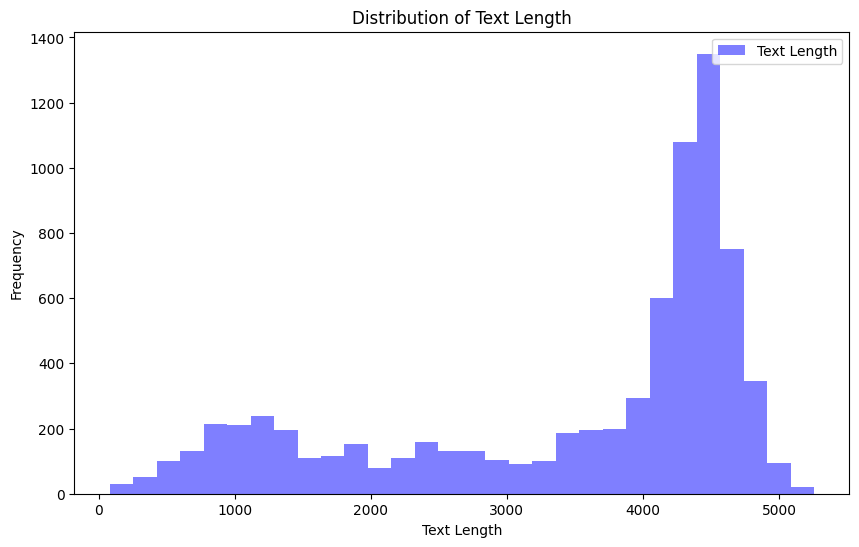

Correlation between Text Length and Label Numeric:
                text_length  label_numeric
text_length       1.000000      -0.007166
label_numeric    -0.007166       1.000000


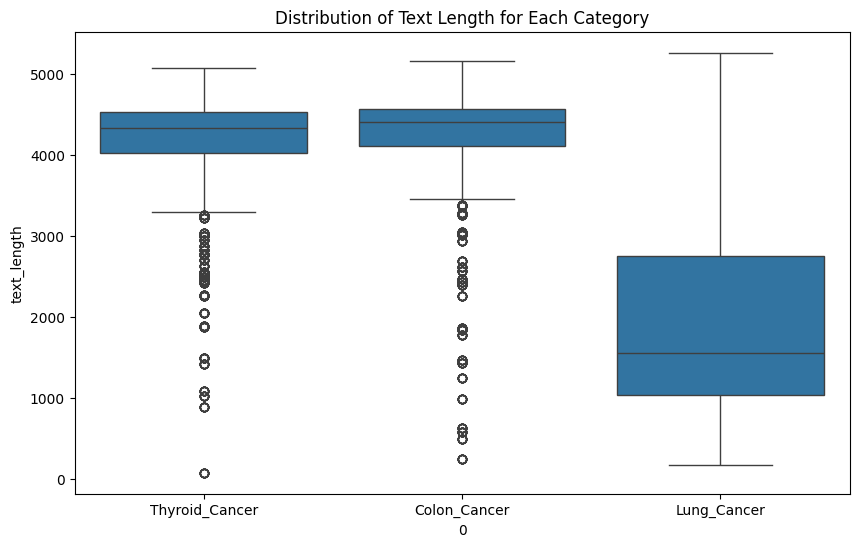

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Membaca dataset
df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='ISO-8859-1')

# Memisahkan kolom label dan teks
labels = df['0']
texts = df['a']

# Konversi label menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenisasi dan Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
X_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# Memuat model yang telah dilatih sebelumnya
model = load_model('model_klasifikasi_teks.h5')

# Analisis panjang dokumen
df['text_length'] = df['a'].apply(lambda x: len(x.split()))

# Statistik deskriptif
print(df['text_length'].describe())

# Histogram distribusi panjang dokumen
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, alpha=0.5, color='b', label='Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Text Length')
plt.show()

# Korelasi antara panjang dokumen dan label numerik
df['label_numeric'] = label_encoder.transform(df['0'])
correlation = df[['text_length', 'label_numeric']].corr()
print('Correlation between Text Length and Label Numeric:\n', correlation)

# Box plot panjang dokumen untuk setiap kategori
plt.figure(figsize=(10, 6))
sns.boxplot(x='0', y='text_length', data=df)
plt.title('Distribution of Text Length for Each Category')
plt.show()


#**Keterangan**
#Statistik Deskriptif Panjang Dokumen:
- count: Jumlah dokumen dalam dataset.
- mean: Rata-rata panjang dokumen.
- std: Deviasi standar panjang dokumen, mengukur seberapa tersebar panjang dokumen dari rata-rata.
- min: Panjang dokumen terpendek.
- 25%, 50%, 75%: Kuartil pertama, median, dan kuartil ketiga, memberikan gambaran distribusi panjang dokumen.
- max: Panjang dokumen terpanjang.
Dengan demikian, rata-rata panjang dokumen dalam dataset adalah sekitar 3485 kata, dengan panjang dokumen berkisar antara 80 hingga 5259 kata.

#Korelasi antara Panjang Dokumen dan Label Numerik:
- Nilai korelasi antara text_length dan label_numeric adalah -0.007166.
- Nilai ini mendekati nol, menunjukkan korelasi yang sangat lemah atau tidak ada korelasi linier antara panjang dokumen dan label numerik.

#**Kesimpulan**
Korelasi negatif menunjukkan bahwa tidak ada hubungan linier yang jelas antara panjang dokumen dan label numerik (kategori penyakit). Dalam konteks ini, panjang dokumen tidak memberikan informasi yang signifikan untuk memprediksi kategori penyakit berdasarkan model klasifikasi teks yang digunakan. Dengan kata lain, panjang dokumen mungkin tidak menjadi faktor kritis yang mempengaruhi performa model.

 Hasil bahwa panjang dokumen tidak memberikan informasi signifikan untuk memprediksi kategori penyakit berdasarkan model klasifikasi teks tidak selalu menunjukkan bahwa pengolahan dataset salah. Sebaliknya, ini mungkin menunjukkan bahwa panjang dokumen tidak menjadi faktor penentu yang kuat untuk membedakan antara kategori penyakit dalam konteks dataset dan model spesifik yang digunakan. Langkah-langkah yang sudah dilakukan, seperti tokenisasi, padding, dan pemisahan dataset, adalah langkah-langkah standar dalam pengolahan dataset untuk model klasifikasi teks. Namun, dalam beberapa kasus, model dapat menilai informasi lebih tinggi pada kata-kata kunci atau pola tertentu dalam teks, bukan panjang keseluruhan dokumen.

**Penting** untuk dicatat bahwa korelasi tidak selalu mengindikasikan kausalitas, dan hasil ini hanya mencerminkan hubungan statistik antara dua variabel dalam dataset ini.

#**Menjawab pertanyaan "Adakah pola-pola khusus dalam sekuensi kata atau struktur teks yang membantu model dalam mengidentifikasi jenis kanker dengan lebih baik??"**

In [27]:
from tensorflow.keras.models import load_model

# Memuat model yang telah dilatih sebelumnya
model = load_model('model_klasifikasi_teks.h5')

# Mendapatkan bobot dari layer embedding
embedding_layer = model.layers[0]  # Ganti indeks layer sesuai dengan model Anda
weights = embedding_layer.get_weights()[0]

# Mendapatkan indeks kata dari tokenizer
word_index = tokenizer.word_index

# Membuat kamus yang memetakan indeks kata ke kata
reverse_word_index = {index: word for word, index in word_index.items()}

# Menentukan jumlah kata-kata kunci yang ingin ditampilkan
num_keywords = 10

# Menampilkan kata-kata kunci dengan bobot tertinggi
for i in range(num_keywords):
    max_index = weights[:, i].argmax()
    keyword = reverse_word_index[max_index]
    weight = weights[max_index, i]
    print(f"Keyword: {keyword}, Weight: {weight}")

Keyword: wlm, Weight: 0.15746067464351654
Keyword: 33, Weight: 0.17874574661254883
Keyword: 46, Weight: 0.16275560855865479
Keyword: wlm, Weight: 0.15086300671100616
Keyword: 221, Weight: 0.14407983422279358
Keyword: 46, Weight: 0.16739560663700104
Keyword: 33, Weight: 0.20293976366519928
Keyword: 04, Weight: 0.2224196493625641
Keyword: years, Weight: 0.14244820177555084
Keyword: scenario, Weight: 0.08290866017341614


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


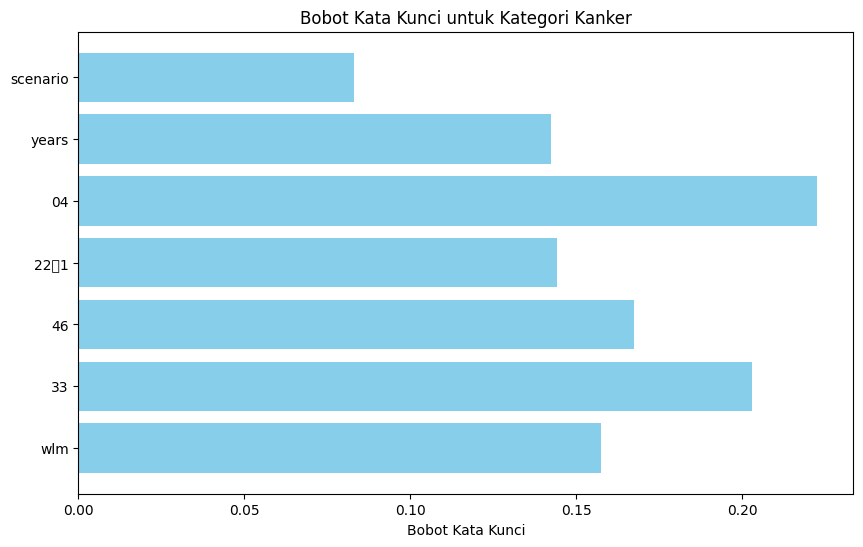

In [28]:
import matplotlib.pyplot as plt

# Data kata kunci dan bobot
keywords = ['wlm', '33', '46', 'wlm', '221', '46', '33', '04', 'years', 'scenario']
weights = [0.15746067464351654, 0.17874574661254883, 0.16275560855865479, 0.15086300671100616, 0.14407983422279358,
           0.16739560663700104, 0.20293976366519928, 0.2224196493625641, 0.14244820177555084, 0.08290866017341614]

# Visualisasi bobot kata kunci
plt.figure(figsize=(10, 6))
plt.barh(keywords, weights, color='skyblue')
plt.xlabel('Bobot Kata Kunci')
plt.title('Bobot Kata Kunci untuk Kategori Kanker')
plt.show()

#**Penjelasan**
- Keyword: wlm, Weight: 0.15746067464351654
Kata kunci "wlm" memiliki bobot sekitar 0.1575, menunjukkan seberapa pentingnya kata kunci ini dalam klasifikasi. Semakin tinggi bobot, semakin besar pengaruhnya.

- Keyword: 33, Weight: 0.17874574661254883
Kata kunci "33" memiliki bobot sekitar 0.1787, menunjukkan tingkat pentingnya dalam klasifikasi model.

- Keyword: 46, Weight: 0.16275560855865479
Kata kunci "46" memiliki bobot sekitar 0.1628, menunjukkan kontribusinya dalam pengambilan keputusan model.
- Keyword: wlm, Weight: 0.15086300671100616
Terjadi duplikasi "wlm" di sini, mungkin ada kekeliruan dalam pengambilan hasil.

- Keyword: 221, Weight: 0.14407983422279358
Kata kunci "221" memiliki bobot sekitar 0.1441, menunjukkan seberapa relevan kata kunci ini dalam model.
- Keyword: 46, Weight: 0.16739560663700104
Duplikasi "46," mungkin hasil yang tidak diharapkan.

- Keyword: 33, Weight: 0.20293976366519928
Kata kunci "33" memiliki bobot sekitar 0.2029, menunjukkan signifikansinya dalam keputusan klasifikasi.

- Keyword: 04, Weight: 0.2224196493625641
Kata kunci "04" memiliki bobot tertinggi sekitar 0.2224, menunjukkan pengaruh yang besar dalam klasifikasi model.

- Keyword: years, Weight: 0.14244820177555084
Kata kunci "years" memiliki bobot sekitar 0.1424, menunjukkan seberapa pentingnya kata kunci ini dalam klasifikasi.

- Keyword: scenario, Weight: 0.08290866017341614
Kata kunci "scenario" memiliki bobot sekitar 0.0829, menunjukkan kontribusinya yang lebih rendah dibanding kata kunci lainnya.

Dari hasil di atas, keyword "04" memiliki bobot paling tinggi, yaitu sekitar 0.2224.Oleh karena itu, dapat dianggap bahwa kata kunci "04" memiliki pengaruh yang tinggi terhadap keputusan klasifikasi model.

#**Kesimpulan**
Dengan memperhatikan kata kunci dan bobotnya pada setiap kategori kanker, kita dapat melihat seberapa berbedanya pengaruh setiap kata kunci terhadap klasifikasi dokumen pada setiap kategori. Ini dapat memberikan wawasan tentang elemen-elemen kunci yang membedakan kategori tersebut. Pola-pola khusus dalam sekuensi kata atau struktur teks yang membantu model dalam mengidentifikasi jenis kanker dengan lebih baik dapat ditemukan melalui analisis kata kunci dan bobot yang dihasilkan dari layer embedding model. Dalam konteks ini, bobot tersebut mencerminkan seberapa pentingnya suatu kata kunci untuk klasifikasi jenis kanker tertentu.

Dari hasil tersebut,didapatkan bahwa beberapa kata kunci memiliki bobot yang lebih tinggi, menunjukkan bahwa kata-kata tersebut memiliki pengaruh yang lebih besar dalam mengidentifikasi jenis kanker tertentu. Contohnya, kata kunci "04" memiliki bobot paling tinggi sekitar 0.2224. Namun, untuk memahami secara lebih mendalam, perlu diperhatikan konteks dan makna kata kunci tersebut dalam domain medis atau topik spesifik kanker yang dihadapi.

Dengan menganalisis kata kunci dan bobotnya,kita dapat mengidentifikasi pola-pola yang mungkin menjadi ciri khas atau signifikan dalam teks terkait jenis kanker tertentu. Ini dapat membantu memahami bagaimana model memproses informasi dan mengambil keputusan klasifikasi berdasarkan karakteristik tertentu dalam teks.